In [2]:
import pandas as pd
import numpy as np

# to plot QQ Plot
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn. preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18696\1838648819.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


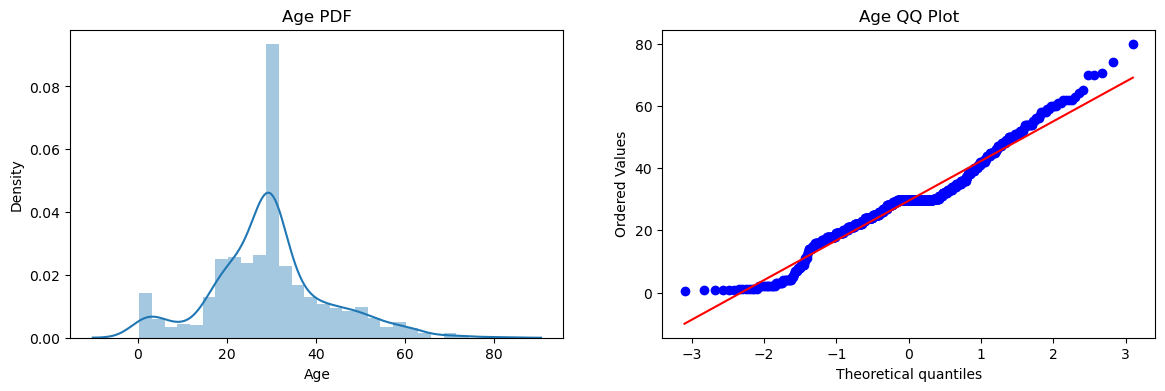

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18696\3786350570.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


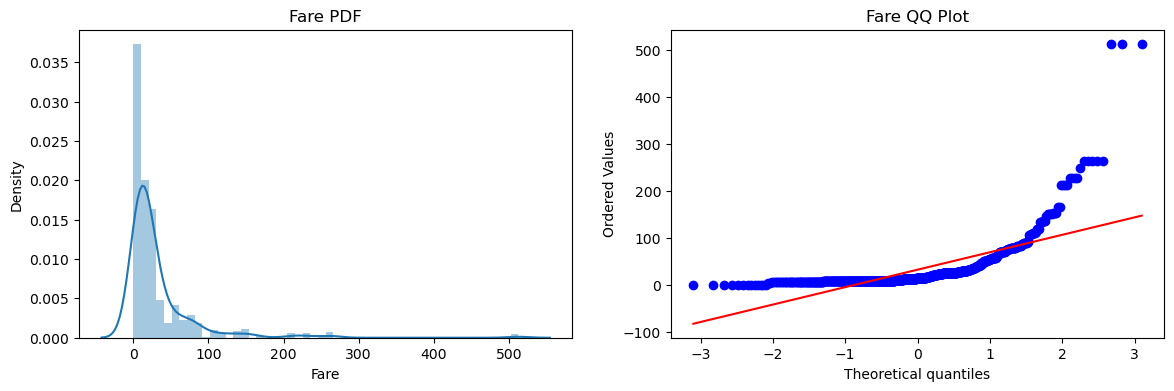

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred_1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred_1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


# After applying log transform (beacuse our Fare data is right skewed)

In [27]:
trf = FunctionTransformer(func =np.log1p)

In [28]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred_1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred_1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


# Cross Validate of these accuracies are true or not

In [31]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610986267166041


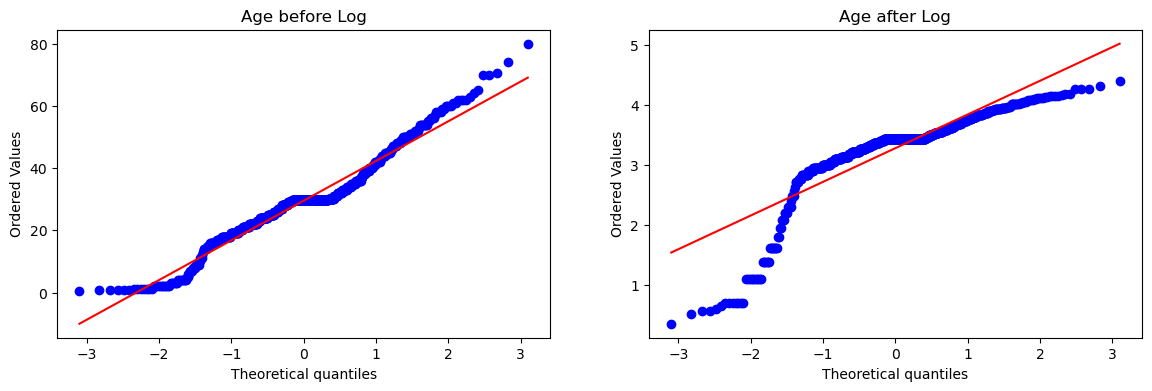

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age after Log')
plt.show()

# result is not good 

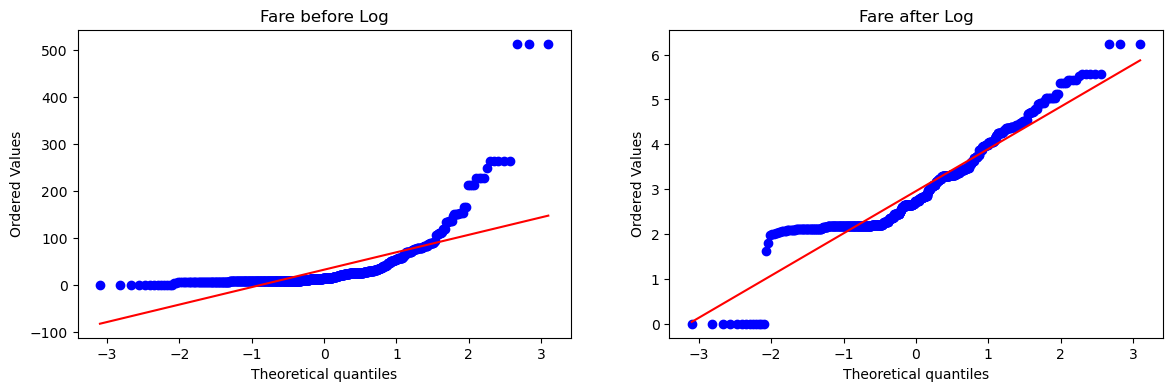

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare after Log')
plt.show()

In [41]:
# Apply log transform only on fare data not on both

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred_1 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred_1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [43]:
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577528089887641


In [52]:
# create a function apply_transform to apply transforms directly 

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title('Fare before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title('Fare after Transform')
    plt.show()

Accuracy 0.6589013732833957


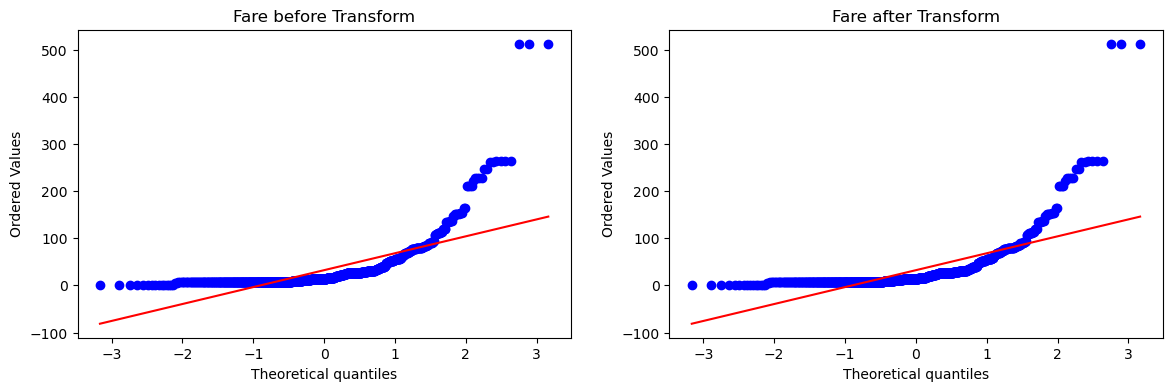

In [53]:
# nothing put
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


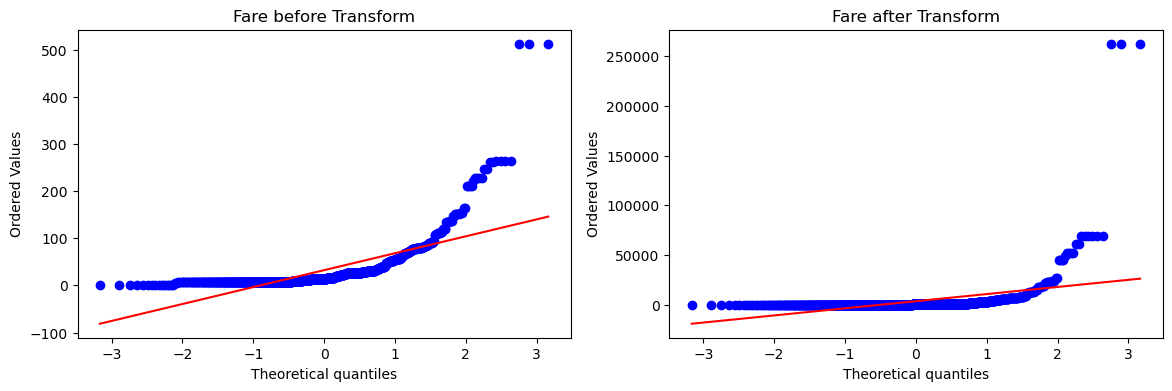

In [54]:
# square
apply_transform(lambda x:x**2)

Accuracy 0.39843945068664166


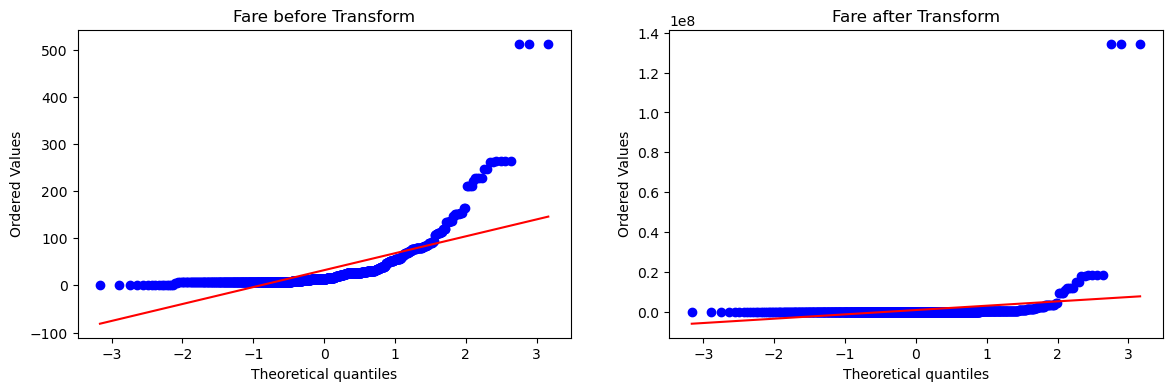

In [55]:
# cube
apply_transform(lambda x:x**3)

Accuracy 0.6589013732833957


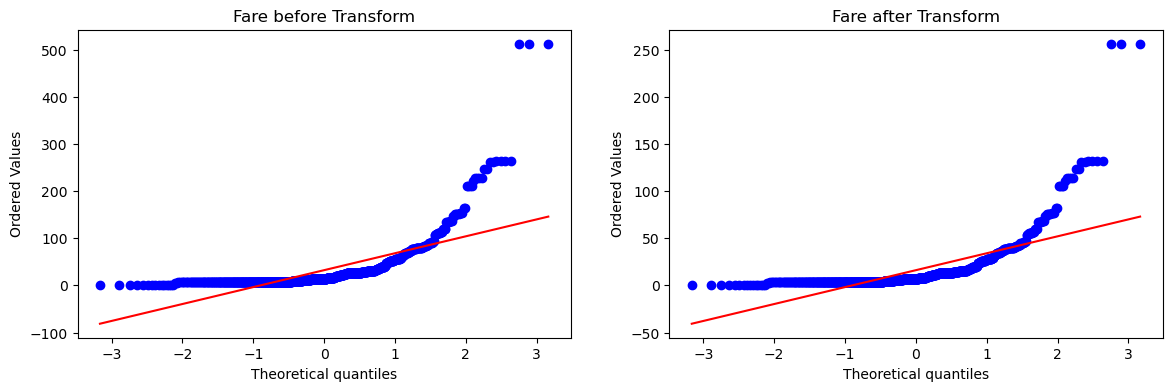

In [56]:
# square root
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


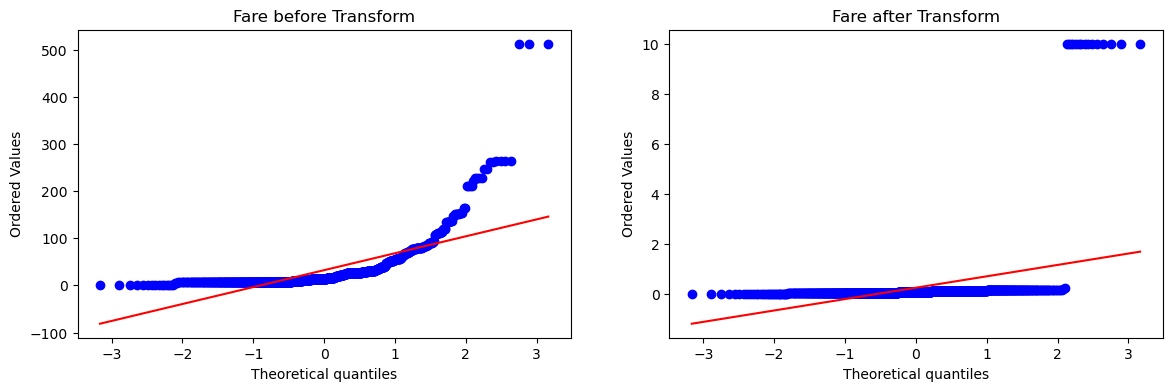

In [59]:
apply_transform(lambda x:1/(x+0.1))